In [39]:
import pandas as pd

In [40]:
data_frame = pd.read_csv("train.csv")

In [41]:
data_frame

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [42]:
data_frame[["day", "month", "year"]] = data_frame["week"].str.split("/", expand=True)

In [43]:
data_frame = data_frame.drop("week", axis=1)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = data_frame.drop("units_sold", axis=1), data_frame["units_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [46]:
model.score(x_test, y_test)

0.7757754347522927

In [47]:
model.score(x_train, y_train)

0.965775565337708

In [48]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.1239578063917

In [49]:
data_frame.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

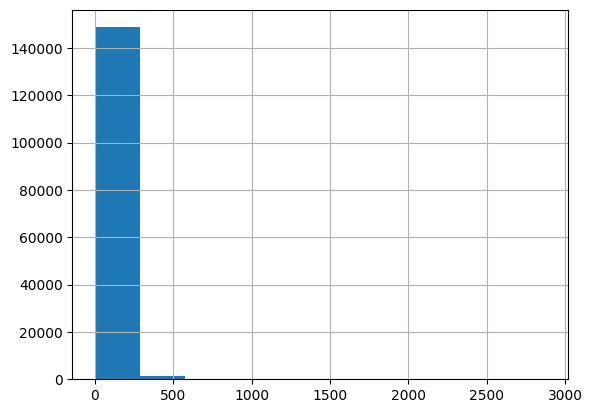

In [50]:
data_frame.units_sold.hist()

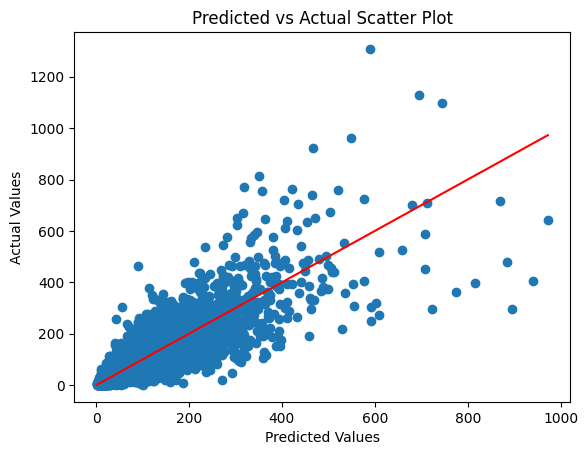

In [51]:
import matplotlib.pyplot as plt
import numpy as np 

plt.scatter(y_pred, y_test)
x_values = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_values, x_values, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.show()

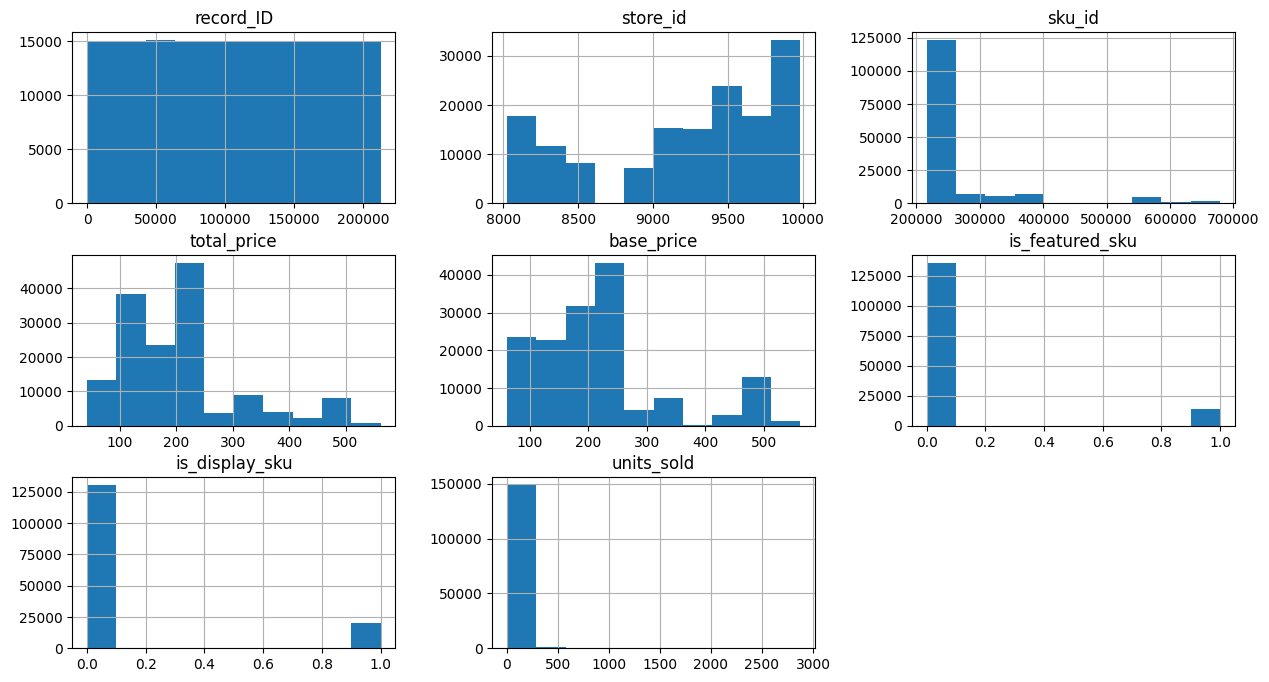

In [52]:
data_frame.hist(figsize=(15, 8))
plt.show()

In [53]:
data_frame = data_frame.drop("record_ID", axis=1)

In [54]:
data_frame

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [55]:
data_frame.store_id.unique()

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984])

In [56]:
len(data_frame.store_id.unique())

76

In [57]:
len(data_frame.sku_id.unique())

28

In [58]:
data_frame.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [59]:
data_frame.units_sold.quantile(0.99)

np.float64(283.0)

In [60]:
data_frame = data_frame[data_frame.units_sold < data_frame.units_sold.quantile(0.99)]

In [61]:
data_frame

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

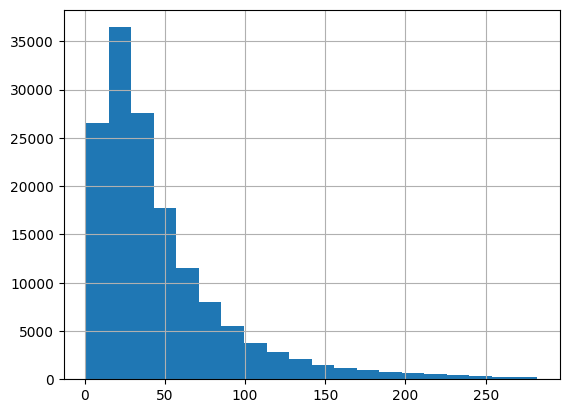

In [62]:
data_frame.units_sold.hist(bins=20)

In [63]:
data_frame = data_frame.join(pd.get_dummies(data_frame.store_id, prefix="store")).drop("store_id", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame.sku_id, prefix="item")).drop("sku_id", axis=1)

In [64]:
model = RandomForestRegressor(n_jobs=-1)

x, y = data_frame.drop("units_sold", axis=1), data_frame["units_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [66]:
model.score(x_test, y_test)

0.8253207625935859

In [67]:
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.84059133151497

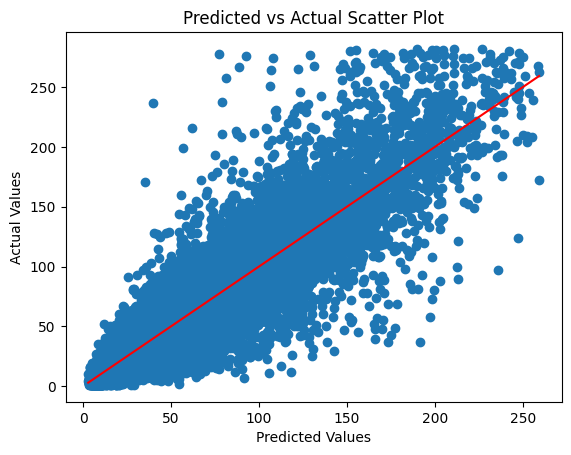

In [68]:
plt.scatter(y_pred, y_test)
x_values = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_values, x_values, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.show()